# Learning Analytics Solutions
## 1. Data Curation and Preperation
Firstly we must analyse and prepare the dataset by cleaning it.

In [1]:
### IMPORTING REQUIRED LIBRARIES
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from scipy import stats
import seaborn as sns
plt.style.use('dark_background')

def removeOutliersSTD(df, col, z_threshold=3):
    # Calculate z-scores for the specified column
    z_scores = stats.zscore(df[col])
    # Identify outliers based on the z-scores
    outliers = (abs(z_scores) > z_threshold)
    # Remove outliers from the DataFrame
    df_no_outliers = df[~outliers]
    return df_no_outliers

def removeNonIntegers(df, column_name):
    # Convert the column to numeric, coercing non-numeric values to NaN
    df[column_name] = pd.to_numeric(df[column_name], errors='coerce')
    # Drop rows with NaN values in the specified column
    df_no_non_integers = df.dropna(subset=[column_name])
    return df_no_non_integers

### 1. LOADING DATASET
file = "dataset.csv"
df = pd.read_csv(file)

### 2. PRE-PROCESSING THE DATASET
#REMOVE NANS
df=df.dropna()
#CAPITALISE ALL ETC
### 3. CAPITALIZE STRING DATA
df=df.apply(lambda x: x.astype(str).str.upper())

#REMOVE WRONG DATA & OUTLIERS
#Remove rows with text in integer column
integers_array=["age","mothers_education","fathers_education","traveltime","studytime","failures","family_relations","freetime","going_out","alcohol_workday","alcohol_weekend","health","absences","grade_term1","grade_term2","grade_final"]
for i in integers_array:
    ### 4. REMOVE STRINGS FROM NUMERICAL COLUMNS
    df = removeNonIntegers(df,i)
    ### 5. REMOVE OUTLIERS FROM NUMERICAL COLUMNS
    df = removeOutliersSTD(df,i)#Grades

### 6. REMOVE GRADE 0's
#Removing grade 0's as these are not helpful, skew the data
df = df[df['grade_term1']!=0]
df = df[df['grade_term2']!=0]
df = df[df['grade_final']!=0]

### 7. REMOVE INCORRECT CATEGORY STRINGS
#REMOVE INCORRECT DATA FROM STRINGS
df = df[df['sex'].isin(["M","F"])]
df = df[df['address'].isin(["U","R"])]
df = df[df["parents_cohabitation"].isin(["T","A"])]
df = df[df['guardian'].isin(["MOTHER","FATHER","OTHER"])]
df = df[df['activities'].isin(["YES","NO"])]
df = df[df['internet'].isin(["YES","NO"])]
df = df[df['romantic_relationship'].isin(["YES","NO"])]

### 8. ENCODING THE ATTRIBUTE CATEGORIES
# Instantiate LabelEncoder
label_encoder = LabelEncoder()
for col in df.columns:
    if col not in integers_array:
        # Fit and transform the categorical column
        df[col] = label_encoder.fit_transform(df[col])

###9. SAVING NEW DATASET
df.to_csv("CLEAN_DATA.csv",index=False)

#RAW DATASET INFORMATION:
#~ 16 YEAR OLD STUDENTS
# 426 DATA RECORDS


## 2. Conduct exporatory data analysis

### Correlation Matrix

Correlation Matrix:


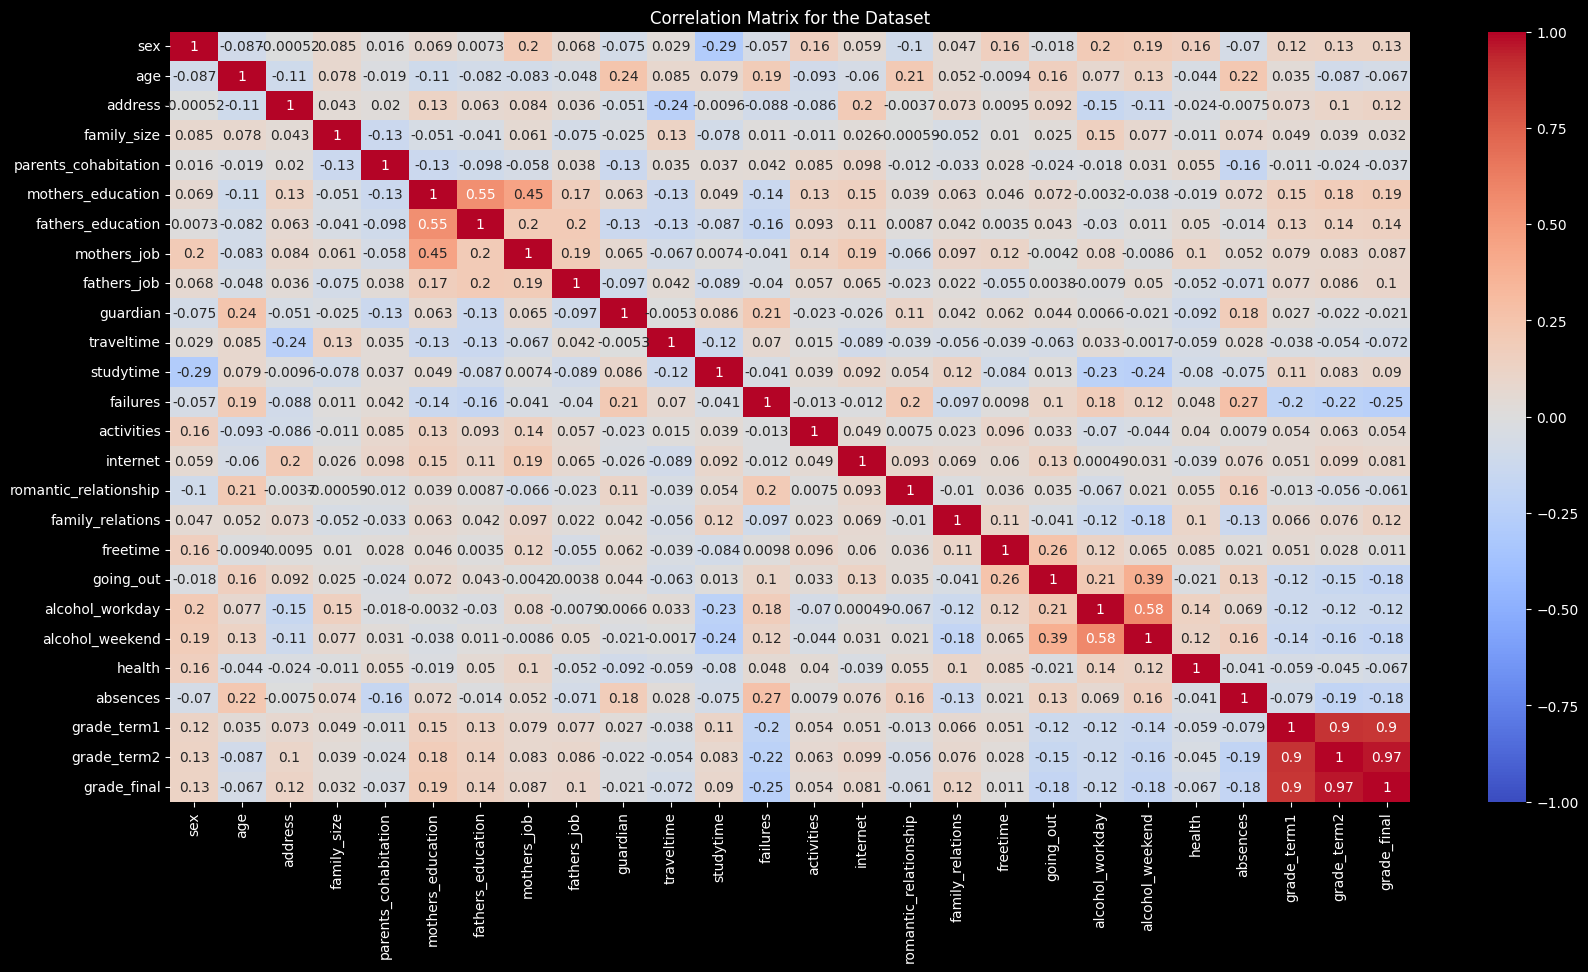

In [13]:
# Find Correlations
numeric_columns = df.select_dtypes(include=['number'])
correlation_matrix = numeric_columns.corr()
plt.figure(figsize=(20, 10))
# Display the correlation matrix
print("Correlation Matrix:")
wow=sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
# Add labels and adjust layout

plt.title('Correlation Matrix for the Dataset')
plt.show()

### Correlation Scatter Plots

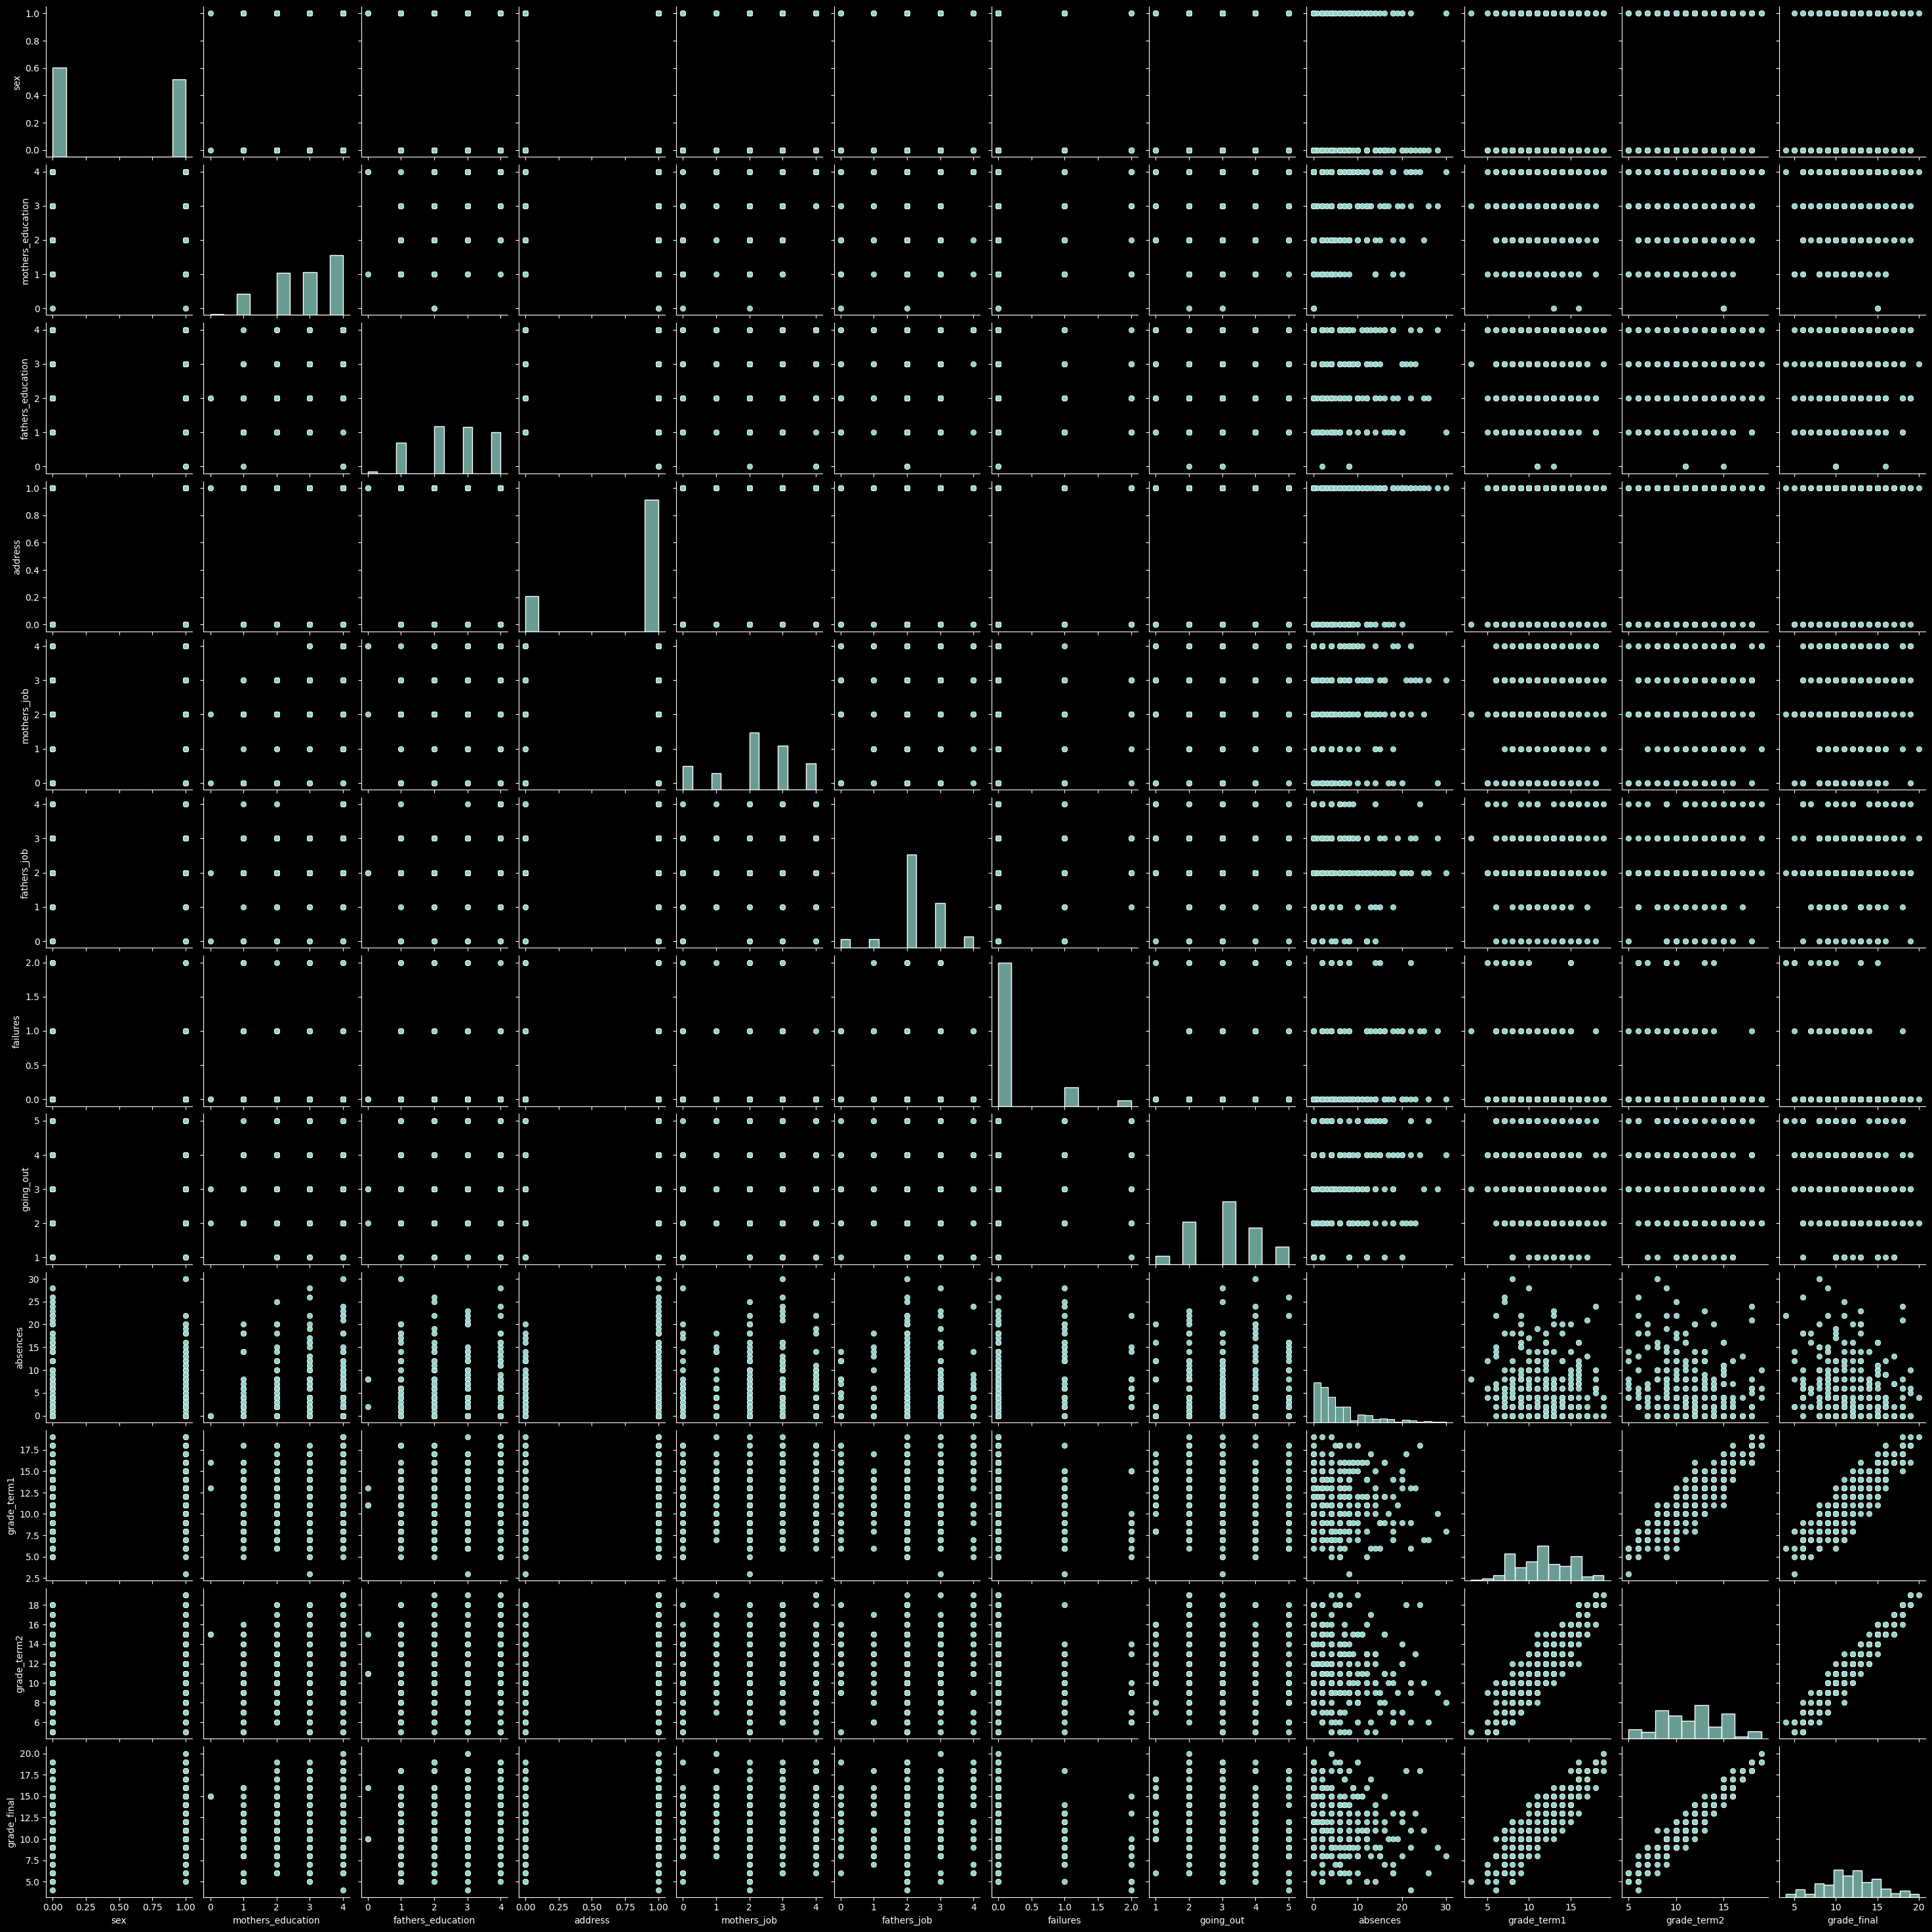

In [210]:
good_features = ["sex","mothers_education","fathers_education","address","mothers_job","fathers_job","failures","going_out","absences"]
columns = good_features+["grade_term1","grade_term2","grade_final"]
sns.pairplot(df[columns])
#THIS PLOT IS TRICKY TO READ AS SO MANY CATEGORY ATTRIBUTES ENCODED

### Grade Histograms

HISTOGRAMS OF GRADES FOR EACH YEAR


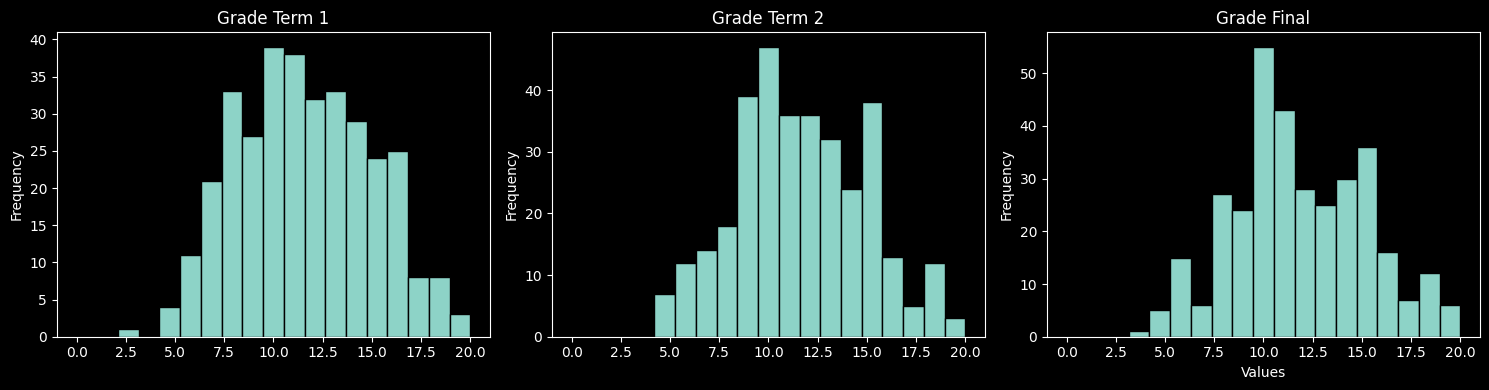

In [164]:
print("HISTOGRAMS OF GRADES FOR EACH YEAR")
fig, axs = plt.subplots(1, 3, figsize=(15, 4))
# Plot histograms for each column
df['grade_term1'].plot(kind='hist',  bins=np.linspace(0, 20, 20), edgecolor='black', ax=axs[0])
axs[0].set_title('Grade Term 1')
df['grade_term2'].plot(kind='hist', bins=np.linspace(0, 20, 20), edgecolor='black', ax=axs[1])
axs[1].set_title('Grade Term 2')
df['grade_final'].plot(kind='hist', bins=np.linspace(0, 20, 20), edgecolor='black', ax=axs[2])
axs[2].set_title('Grade Final')


# Add labels and adjust layout
plt.xlabel('Values')
plt.ylabel('Frequency')
plt.tight_layout()


## 3. Train THREE machine learning models
### Using all available data

In [212]:



def linear_regression(df,):
    # SPLIT DATA INTO TRAINING AND TESTING SETS
    X = df.drop(['grade_final',"grade_term1","grade_term2"], axis=1)
    y = df['grade_final']

    # Split the data into training and testing sets (80% training, 20% testing in this example)
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

    # Standardize the features using StandardScaler (optional but can be beneficial for linear regression)
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)

    # Build a linear regression model
    model = LinearRegression()
    # Train the model
    model.fit(X_train_scaled, y_train)
    # Make predictions on the test set
    y_pred = model.predict(X_test_scaled)

    # Calculate the mean squared error
    mse = mean_squared_error(y_test, y_pred)
    print(f"Mean Squared Error on Test Set: {mse}")

    # Calculate R-squared (R²)
    r2 = r2_score(y_test, y_pred)
    print(f"R-squared (R²): {r2}")

    # Print the coefficients and intercept
    print("Coefficients:", model.coef_)
    plt.scatter(y_test, y_pred)
    plt.title('Scatter Plot: Actual vs Predicted Values')
    plt.xlabel('Actual Values')
    plt.ylabel('Predicted Values')
    plt.show()

    return model

class Predictor:
    def __init__(self,df,target,select_features,drop_features):
        if select_features!=[]:
            X = df[select_features]
        else:
            X = df.drop(drop_features, axis=1)
        y = df[target]
        # Split the data into training and testing sets
        self.X_train, self.X_test, self.y_train, self.y_test = train_test_split(X, y, test_size=0.2)

    #TRAIN with a Neural Network
    def train_NN(self):
        # Standardize the features using StandardScaler
        scaler = StandardScaler()
        self.X_train_scaled = scaler.fit_transform(self.X_train)
        self.X_test_scaled = scaler.transform(self.X_test)

        # Build a neural network model
        self.model = Sequential()
        self.model.add(Dense(128, activation='relu', input_shape=(self.X_train.shape[1],)))
        self.model.add(Dense(64, activation='relu'))
        self.model.add(Dense(32, activation='relu'))
        self.model.add(Dense(1, activation='linear'))

        # Comile the model
        self.model.compile(optimizer='adam', loss='mean_squared_error')
        self.model.fit(self.X_train_scaled, self.y_train, epochs=50, batch_size=1, verbose=1,validation_split=0.1)
        self.y_pred = self.model.predict(self.X_test_scaled)

    #TRAIN with Linear Regression
    def train_LR(self):
        scaler = StandardScaler()
        X_train_scaled = scaler.fit_transform(self.X_train)
        X_test_scaled = scaler.transform(self.X_test)

        #Initialise model
        model = LinearRegression()
        #Train the model using the prepared data
        model.fit(X_train_scaled, self.y_train)
        #Predict y
        self.y_pred = model.predict(X_test_scaled)


    def report_performance(self):
        # Calculate the mean squared error
        mse = mean_squared_error(self.y_test, self.y_pred)
        mse_text = f"Mean Squared Error on Test Set: {mse:.5f}"
        # Calculate Mean Absolute Error 
        mae = mean_absolute_error(self.y_test, self.y_pred)
        mae_text = f"Mean Absolute Error (MAE): {mae:.5f}"
        # Calculate R-squared
        r2 = r2_score(self.y_test, self.y_pred)
        r2_text = f"R-squared (R²): {r2:.5f}"

        full_text = mse_text+"\n"+mae_text+"\n"+r2_text

        return full_text


In [194]:
def create_scatters(grade1_predict,grade2_predict,grade3_predict,title):
    text1=grade1_predict.report_performance()
    text2=grade2_predict.report_performance()
    text3=grade3_predict.report_performance()

    #PLOTTING scatters of the models
    fig, axs = plt.subplots(1, 3, figsize=(15, 4))
    axs[0].scatter(grade1_predict.y_test,grade1_predict.y_pred)
    axs[0].set_title("Grade Term 1")
    axs[0].text(0.5, -0.2, text1, horizontalalignment='center', verticalalignment='center', transform=axs[0].transAxes)

    axs[1].scatter(grade2_predict.y_test,grade2_predict.y_pred)
    axs[1].set_title("Grade Term 2")
    axs[1].text(0.5, -0.2, text2, horizontalalignment='center', verticalalignment='center', transform=axs[1].transAxes)

    axs[2].scatter(grade3_predict.y_test,grade3_predict.y_pred)
    axs[2].set_title("Final Grade")
    axs[2].text(0.5, -0.2, text3, horizontalalignment='center', verticalalignment='center', transform=axs[2].transAxes)
    plt.suptitle(title, y=1.05)
    plt.tight_layout()

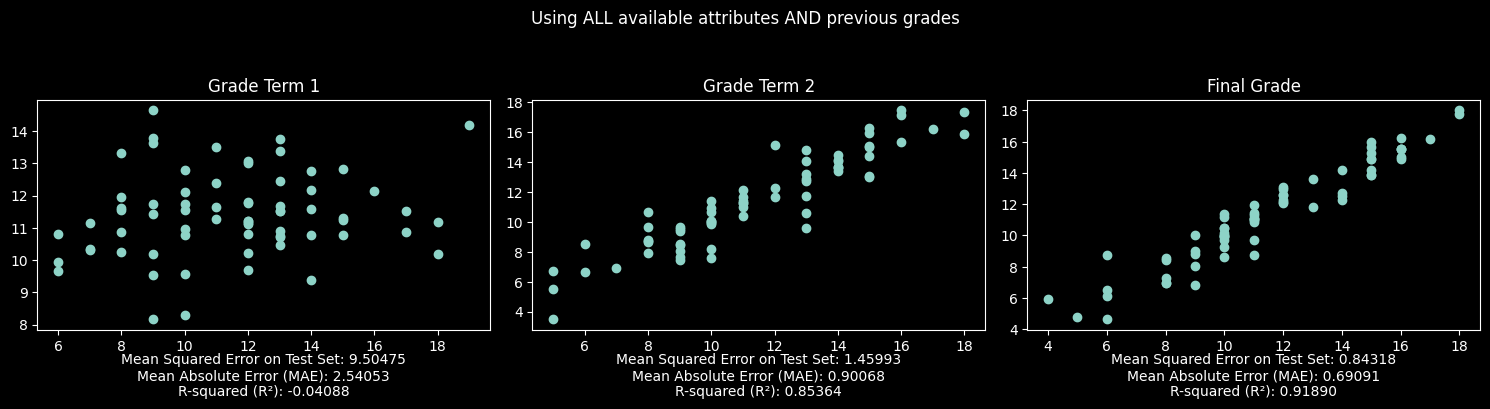

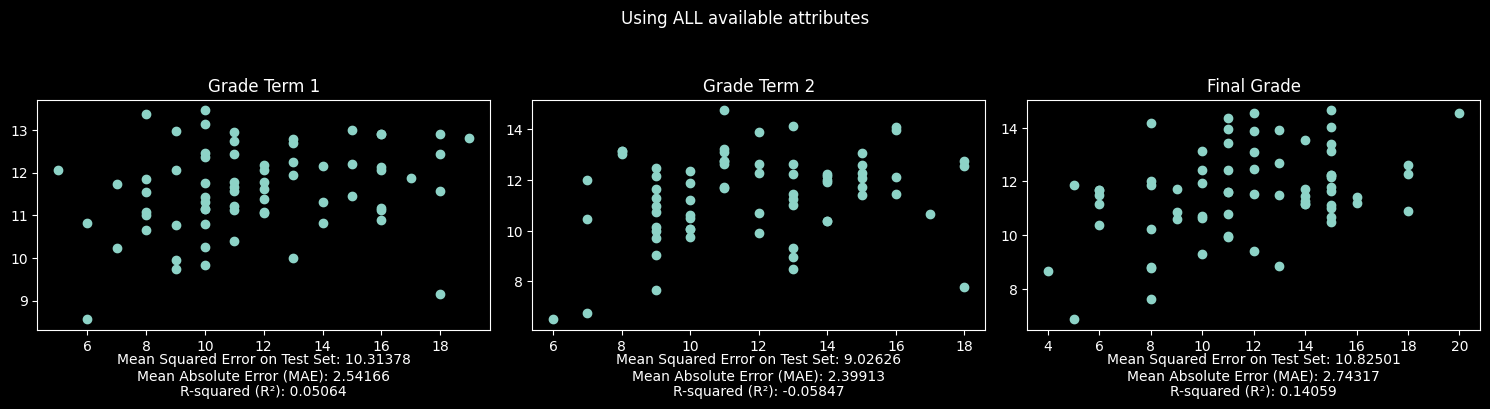

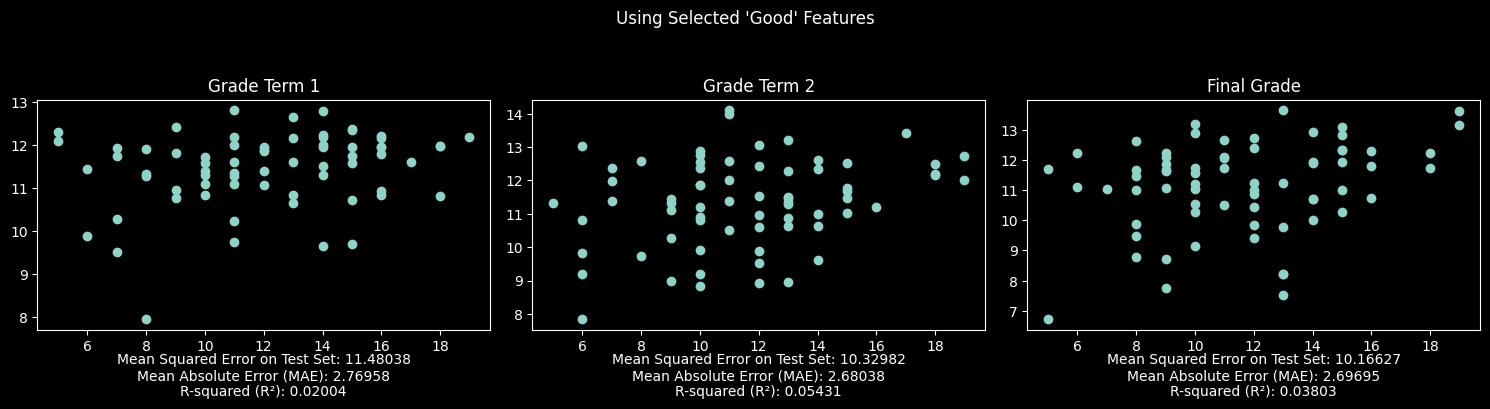

In [211]:
good_features = ["sex","mothers_education","fathers_education","address","mothers_job","fathers_job","failures","going_out","absences"]
#CREATING MODELS TO FIND BEST METHODS

#1. Using ALL available data, including previous Grades
grade1_predict = Predictor(df,"grade_term1",[],["grade_term1","grade_term2","grade_final"])
grade1_predict.train_LR()
grade2_predict = Predictor(df,"grade_term2",[],["grade_term2","grade_final"])
grade2_predict.train_LR()
grade3_predict = Predictor(df,"grade_final",[],["grade_final"])
grade3_predict.train_LR()
create_scatters(grade1_predict,grade2_predict,grade3_predict,"Using ALL available attributes AND previous grades")

#2. Using ALL Personal Information
grade1_predict = Predictor(df,"grade_term1",[],["grade_term1","grade_term2","grade_final"])
grade1_predict.train_LR()
grade2_predict = Predictor(df,"grade_term2",[],["grade_term1","grade_term2","grade_final"])
grade2_predict.train_LR()
grade3_predict = Predictor(df,"grade_final",[],["grade_term1","grade_term2","grade_final"])
grade3_predict.train_LR()
create_scatters(grade1_predict,grade2_predict,grade3_predict,"Using ALL available attributes")

#3. Using Selected Features
grade1_predict = Predictor(df,"grade_term1",good_features,[])
grade1_predict.train_LR()
grade2_predict = Predictor(df,"grade_term2",good_features,[])
grade2_predict.train_LR()
grade3_predict = Predictor(df,"grade_final",good_features,[])
grade3_predict.train_LR()
create_scatters(grade1_predict,grade2_predict,grade3_predict,"Using Selected 'Good' Features")


